In [1]:
### We will visualize the distribution of engagement as a swarm plot.
### We will have one swarmplot for all the environmental tweets,
### then one for the disruptive protests and one for the non-disruptive ones.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("../../output/mvp/5.merged_dataframes/keywords.csv", sep="|")

In [4]:
df = df[df.classification != 'fp'].reset_index()

In [5]:
df = df.drop(columns=['conversation_id', 'like_count', 'reply_count', 'quote_count',
       'retweet_count', 'date', 'date_str', '7_days_before',
       '7_days_after', 'week_id', 'has_protest_keywords',
       'has_climate_keywords', 'has_both_keywords', 'protest_tokens',
       'climate_tokens', 'index', 'Unnamed: 0'])

In [6]:
df.to_csv("../mvp/viz.engagement-distribution/data.csv")

In [7]:
# A check to be sure that both groups are evenly distributed over time
df['datetime'] = pd.to_datetime(df.datetime)

<AxesSubplot: xlabel='datetime', ylabel='percentile_for_total_engagement'>

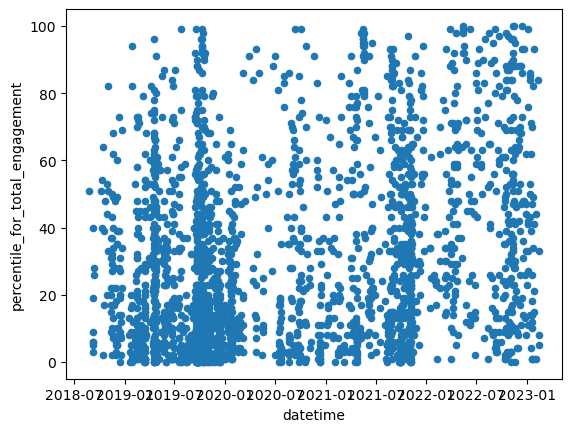

In [8]:
####
df.plot(kind='scatter', y='percentile_for_total_engagement', x='datetime')

In [9]:
df = df.set_index("datetime")

In [10]:
df['year'] = df.index.year

['d', 'nd']

2019    0.564780
2021    0.196226
2020    0.140881
2022    0.054088
2018    0.033962
2023    0.010063
Name: year, dtype: float64

,index,both
4,2018,0.033962
0,2019,0.564780
2,2020,0.140881
1,2021,0.196226
3,2022,0.054088
5,2023,0.010063


['nd']

2019    0.548387
2021    0.210445
2020    0.164363
2022    0.036866
2018    0.033794
2023    0.006144
Name: year, dtype: float64

,index,non-disruptive
4,2018,0.033794
0,2019,0.548387
2,2020,0.164363
1,2021,0.210445
3,2022,0.036866
5,2023,0.006144


['d']

2019    0.638889
2022    0.131944
2021    0.131944
2020    0.034722
2018    0.034722
2023    0.027778
Name: year, dtype: float64

,index,disruptive
4,2018,0.034722
0,2019,0.638889
3,2020,0.034722
2,2021,0.131944
1,2022,0.131944
5,2023,0.027778


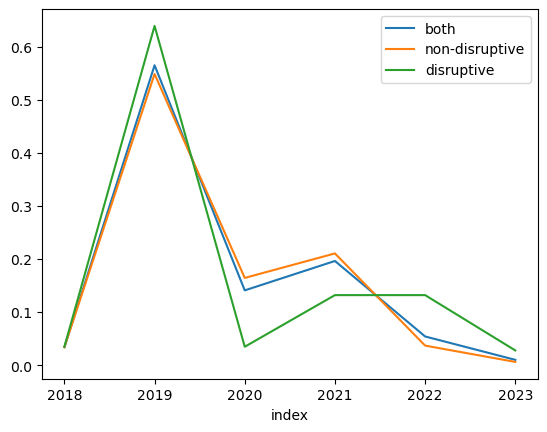

In [11]:
# Let's see the share of very high engagement (> 10%) per group per year
fig, ax = plt.subplots()
for classification, label in zip([['d', 'nd'], ['nd'], ['d']], ['both', 'non-disruptive', 'disruptive']):
    
    display(classification)
    display(
        df[(df.percentile_for_total_engagement <= 10) & (df.classification.isin(classification))].year.value_counts(normalize=True)
    )
    
    data = df[(df.percentile_for_total_engagement <= 10) & (df.classification.isin(classification))].year.value_counts(normalize=True).reset_index()
    data = data.rename(columns={"year": label})
    
    display(data.sort_values(by='index'))
    
    data = data.sort_values(by='index')
    data.plot(x='index', y=label, kind='line', ax=ax)

Share of high engagement tweets – both
2023 - 18.6046511627907
2022 - 12.536443148688047
2021 - 26.53061224489796
2020 - 35.22012578616352
2019 - 40.781108083560405
2018 - 30.0

Share of high engagement tweets – nd
2023 - 22.22222222222222
2022 - 13.114754098360656
2021 - 29.978118161925604
2020 - 38.628158844765345
2019 - 51.96506550218341
2018 - 48.888888888888886

Share of high engagement tweets – d
2023 - 16.0
2022 - 11.875
2021 - 14.50381679389313
2020 - 12.195121951219512
2019 - 22.22222222222222
2018 - 11.11111111111111



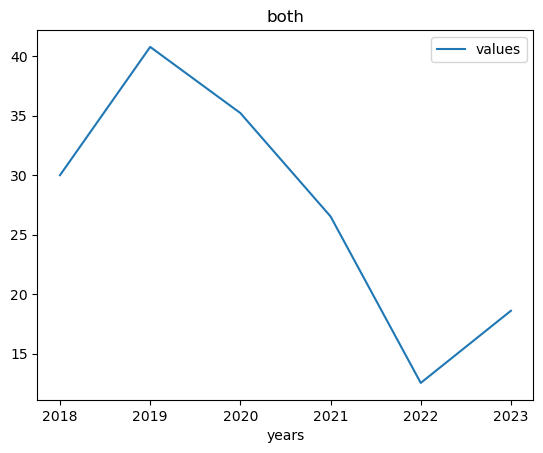

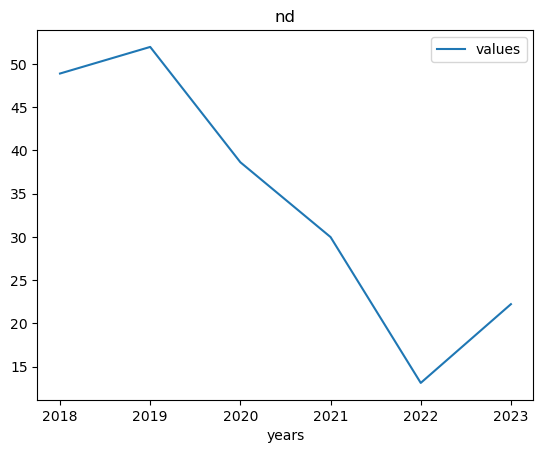

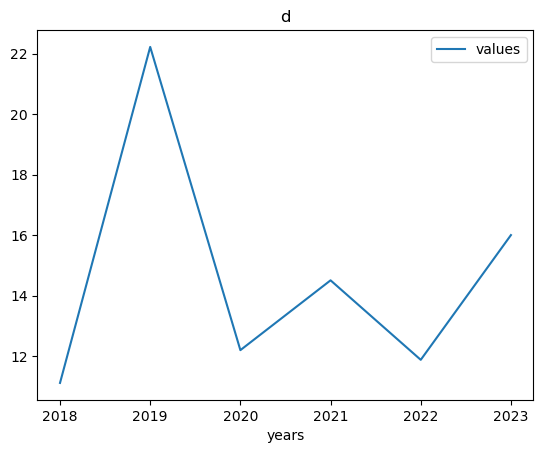

In [12]:
# What's the share of high engagement pre group per year?
for label, classification in zip(
    ["both", "nd", "d"],
    [["nd", "d"], ["nd"], ["d"]]
):
    
    print("Share of high engagement tweets –", label)
    to_plot = {
        "years": [] ,
        "values": []
        
    }
    for year in df.year.unique():
        
        subset = df[(df.classification.isin(classification)) & (df.year==year)]
        
        all_tweets = subset.shape[0]
        high_engagement_tweets = subset[(subset.percentile_for_total_engagement <= 10)].shape[0]
        share = high_engagement_tweets / all_tweets * 100
    
        to_plot['years'].append(year)
        to_plot['values'].append(share)


        print(year, "-", share)
        
    pd.DataFrame(to_plot).plot(x='years', y='values', title=label)
    print()